Problem Statement:  In late 2023, Spotify introduced significant changes to its app, restricting access to even basic features for users on its free plan. This shift in functionality may influence user behavior and their willingness to subscribe to a premium plan.

Using a newly available dataset from Kaggle, this project aims to build a predictive model to analyze and understand whether these changes are prompting more users to consider subscribing to Spotify’s premium service. By evaluating user preferences, listening habits, and other key factors, this analysis seeks to provide insights into potential churn (Premium Users) and subscription behavior in response to Spotify's updated service model.

# Spotify User Behavior Analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('Spotify_user_research.xlsx')
data.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,35~60,Others,More than 2 years,Smartphone,Family Plan-Rs 179/month,Yes,Family Plan-Rs 179/month,Podcast,Pop,Afternoon,Sadness or melancholy,Once a week,Recommendations,5,Daily,Comedy,NaN,NaN,Short (less than 15 minutes),Satisfied
1,20~35,Male,6 months to 1 year,Smart speakers or voice assistants,Family Plan-Rs 179/month,No,Family Plan-Rs 179/month,Podcast,Rock,Morning,Social gatherings or parties,Rarely,Recommendations,1,Once a week,Technology,Discussion,Both,Short (less than 15 minutes),Dissatisfied
2,12~20,Female,More than 2 years,Computer or laptop,Free (ad-supported),No,Student Plan-Rs 59/month,Music,Pop,Morning,Relaxation and stress relief,Rarely,Recommendations,4,Several times a week,NaN,NaN,Both,Long (more than 30 minutes),Very Satisfied
3,12~20,Female,Less than 6 months,Computer or laptop,Student Plan-Rs 59/month,No,Individual Plan- Rs 119/month,Music,Rock,Night,Social gatherings or parties,Rarely,Playlists,5,Daily,NaN,NaN,Well known individuals,Medium (15-30 minutes),Satisfied
4,12~20,Male,1 year to 2 years,Smartphone,Individual Plan- Rs 119/month,Yes,NaN,Podcast,Pop,Evening,Social gatherings or parties,Once a week,Playlists,4,Rarely,NaN,Interview,Well known individuals,NaN,Very Satisfied


In [3]:
data.dtypes

Age                            object
Gender                         object
spotify_usage_period           object
spotify_listening_device       object
spotify_subscription_plan      object
premium_sub_willingness        object
preffered_premium_plan         object
preferred_listening_content    object
fav_music_genre                object
music_time_slot                object
music_Influencial_mood         object
music_lis_frequency            object
music_expl_method              object
music_recc_rating               int64
pod_lis_frequency              object
fav_pod_genre                  object
preffered_pod_format           object
pod_host_preference            object
preffered_pod_duration         object
pod_variety_satisfaction       object
dtype: object

In [4]:
data.shape

(28546, 20)

In [5]:
data.isna().sum()

Age                               0
Gender                            0
spotify_usage_period              0
spotify_listening_device          0
spotify_subscription_plan         0
premium_sub_willingness           0
preffered_premium_plan         8073
preferred_listening_content       0
fav_music_genre                   0
music_time_slot                   0
music_Influencial_mood            0
music_lis_frequency               0
music_expl_method                 0
music_recc_rating                 0
pod_lis_frequency                 0
fav_pod_genre                  5395
preffered_pod_format           7347
pod_host_preference            7385
preffered_pod_duration         6918
pod_variety_satisfaction          0
dtype: int64

In [6]:
data['preffered_premium_plan'].fillna(0, inplace = True)

In [7]:
data['preffered_premium_plan'].value_counts()

preffered_premium_plan
0                                   8073
Student Plan-Rs 59/month            6375
Family Plan-Rs 179/month            6132
Individual Plan- Rs 119/month       4646
Duo plan- Rs Both9/month            1678
Individual Plan- Rs Both9/ month    1634
Family Plan-Rs 1Sports9/month          8
Name: count, dtype: int64

In [8]:
# Replacing the missing value with unknown to retain the sample size
data['fav_pod_genre'].fillna('Unknown', inplace=True)
data['preffered_pod_format'].fillna('Unknown', inplace=True)
data['pod_host_preference'].fillna('Unknown', inplace=True)
data['preffered_pod_duration'].fillna('Unknown', inplace=True)

In [50]:
# To print the total number of premium users
paid_plans = ['Family Plan-Rs 179/month', 'Student Plan-Rs 59/month', 'Individual Plan- Rs 119/month', 'Premium (paid subscription)']
plan_counts = data['spotify_subscription_plan'].value_counts()
total_paid_users = plan_counts[paid_plans].sum()
print(f'Premium users: {total_paid_users}')

#To print the total number of free users
free_counts = data.spotify_subscription_plan.value_counts().get('Free (ad-supported)')
print ('Free Users:', free_counts)

print(f'Total Number of Users: {data.shape[0]}')


Premium users: 17267
Free Users: 11279
Total Number of Users: 28546


In [10]:
data['spotify_subscription_plan'].value_counts()

spotify_subscription_plan
Free (ad-supported)              11279
Student Plan-Rs 59/month          4701
Family Plan-Rs 179/month          4670
Individual Plan- Rs 119/month     4590
Premium (paid subscription)       3306
Name: count, dtype: int64

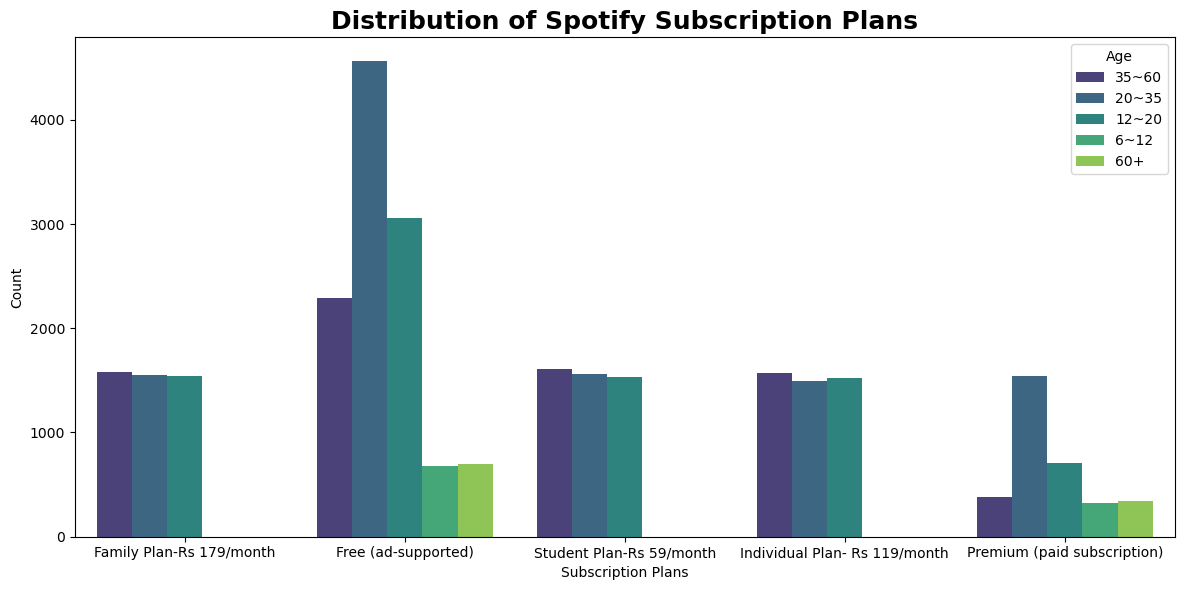

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(x='spotify_subscription_plan', hue ='Age', data=data, palette='viridis')
plt.title('Distribution of Spotify Subscription Plans', fontsize=18, fontweight='bold')
plt.xlabel('Subscription Plans')
plt.ylabel('Count')
plt.xticks(rotation=0, ha='center', fontsize=10)
plt.tight_layout()
plt.show()

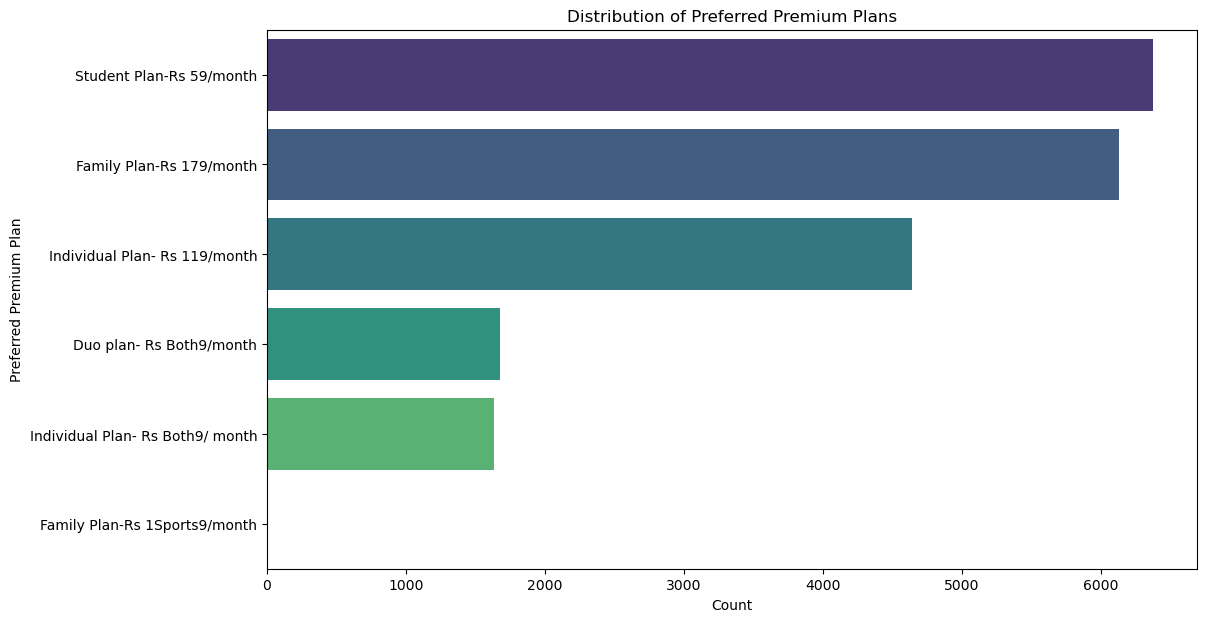

In [12]:
premium_plan_counts = data['preffered_premium_plan'].value_counts().reset_index()
premium_plan_counts.columns = ['preffered_premium_plan', 'count']

# Filter out the category '0'
premium_plan_counts = premium_plan_counts[premium_plan_counts['preffered_premium_plan'] != 0]

# Plotting the Horizontal Bar Plot without '0'
plt.figure(figsize=(12, 7))
sns.barplot(x='count', y='preffered_premium_plan', data=premium_plan_counts, palette='viridis')
plt.title('Distribution of Preferred Premium Plans')
plt.xlabel('Count')
plt.ylabel('Preferred Premium Plan')
plt.show()

Gender
Female    11164
Male      10913
Others     6469
Name: count, dtype: int64


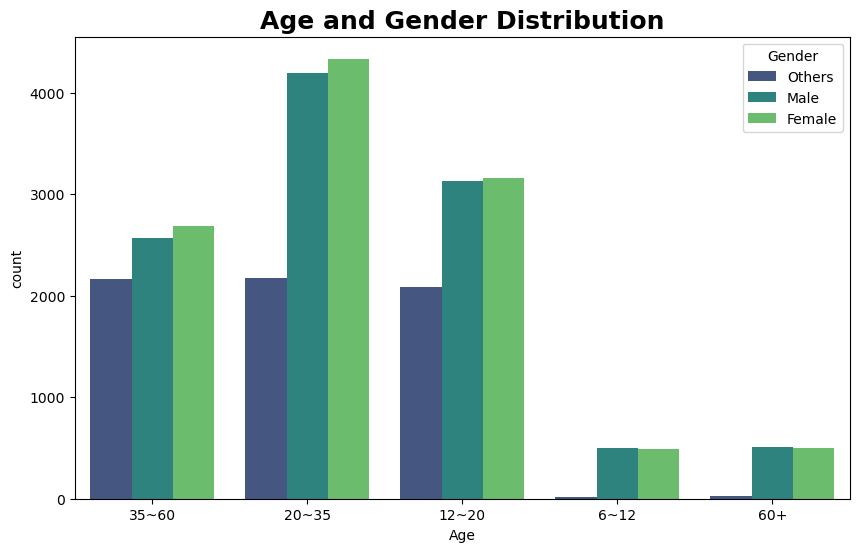

In [13]:
#Demographic Distribution
print(data.Gender.value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Age', hue='Gender', palette='viridis')
plt.title('Age and Gender Distribution', fontsize=18, fontweight='bold')
plt.show()

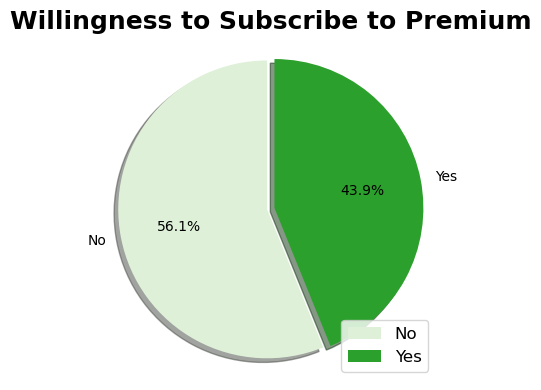

In [14]:
plt.figure(figsize=(4, 4))
colors = ['#DFF0D8', '#2CA02C']
data['premium_sub_willingness'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, explode=[0.05, 0], shadow=True, colors=sns.color_palette(colors))
plt.title('Willingness to Subscribe to Premium', fontsize=18, fontweight='bold')
plt.axis('equal')
plt.legend(labels=data['premium_sub_willingness'].value_counts().index, loc='best', fontsize=12)  # Add legend
plt.ylabel('')
plt.tight_layout()
plt.show()

preferred_listening_content
Music      16779
Podcast    11767
Name: count, dtype: int64


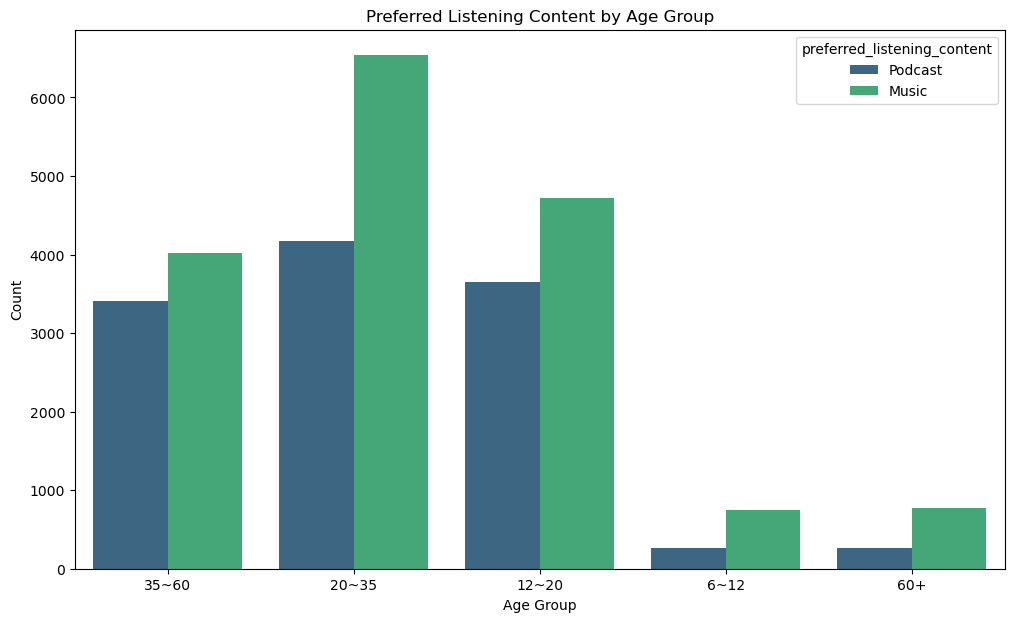

In [15]:
print(data['preferred_listening_content'].value_counts())
plt.figure(figsize=(12, 7))
sns.countplot(x='Age', hue='preferred_listening_content', data=data, palette='viridis')
plt.title('Preferred Listening Content by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

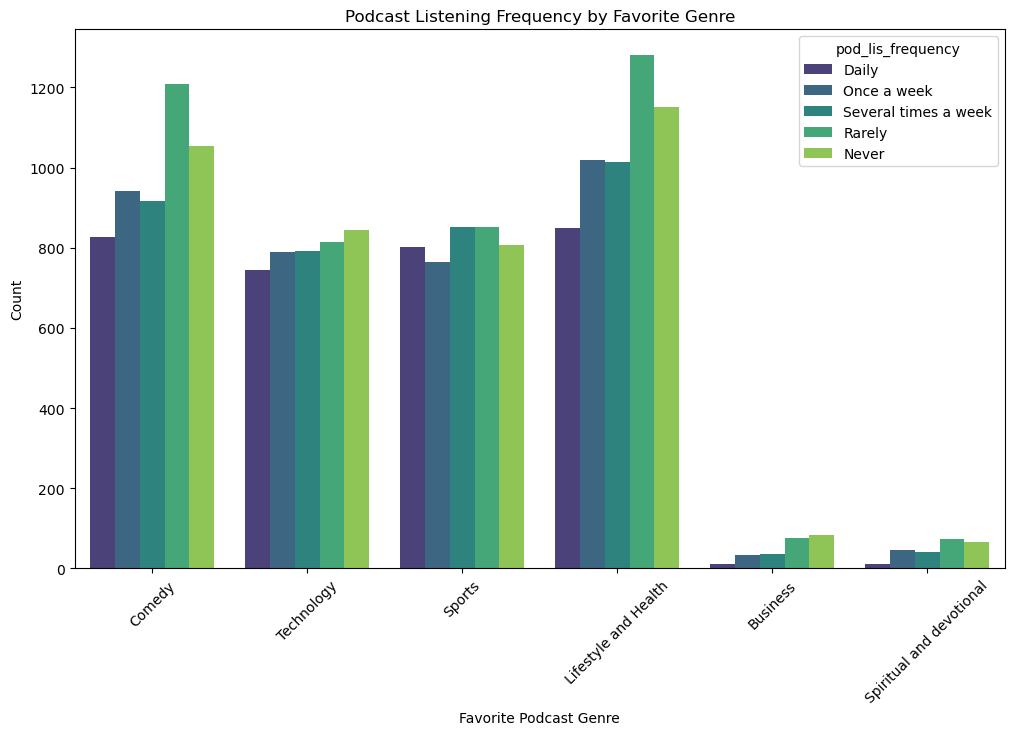

In [16]:
#Plotting few categories 
categories_to_plot = ['Comedy', 'Technology', 'Sports', 'Business', 'Lifestyle and Health', 'Food and Cooking', 'General Knowledge', 'Spiritual and devotional']

# Filter the DataFrame to include only the specified categories
filtered_data = data[data['fav_pod_genre'].isin(categories_to_plot)]

# Plotting the filtered DataFrame
plt.figure(figsize=(12, 7))
sns.countplot(x='fav_pod_genre', hue='pod_lis_frequency', data=filtered_data, palette='viridis')
plt.title('Podcast Listening Frequency by Favorite Genre')
plt.xlabel('Favorite Podcast Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

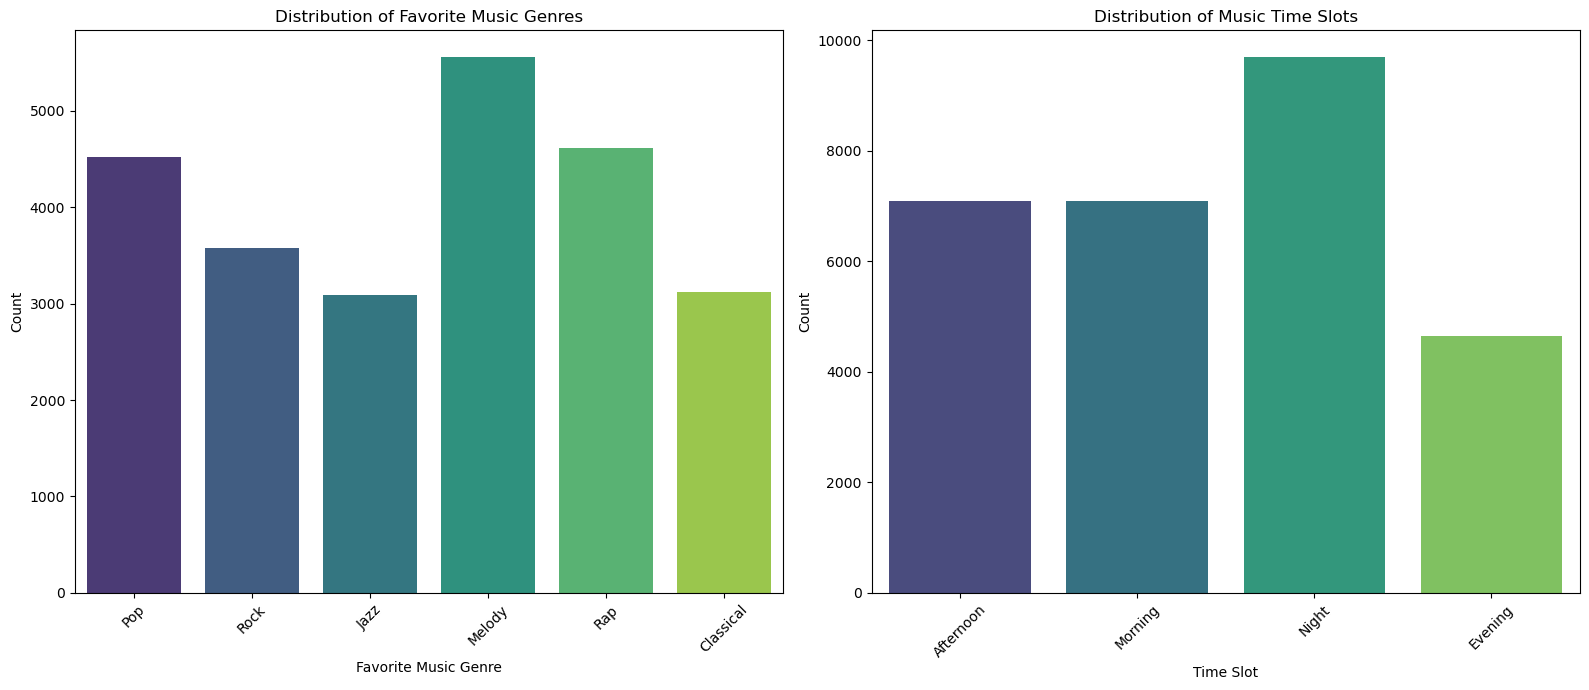

In [17]:
# Filter data for specific genres
genres_to_plot = ['Pop', 'Rock', 'Jazz', 'Melody', 'Rap', 'Classical']
filtered_data = data[data['fav_music_genre'].isin(genres_to_plot)]

# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 7))

# Plot 1: Bar plot for fav_music_genre
sns.countplot(x='fav_music_genre', data=filtered_data, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Favorite Music Genres')
axes[0].set_xlabel('Favorite Music Genre')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Stacked bar plot for music_time_slot
sns.countplot(x='music_time_slot', data=data, palette='viridis', ax=axes[1])
axes[1].set_title('Distribution of Music Time Slots')
axes[1].set_xlabel('Time Slot')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

# Insights Uncovered

1. Despite 60% of current users being subscribers, there is observed low subscription willingness based on recent analysis.

2. Among premium users, the student plan represents the highest adoption rate at 27%.

3. Females aged between 20 and 35 constitute 39% of the total sample population.

4. Music listening is preferred over podcasts by 58% across all age groups.

5. The Melody genre is the most favored music genre, with a preference for nighttime listening among the majority of users.

6. Podcast genres, particularly lifestyle and health, receive the highest daily engagement, while others exhibit mixed reviews.

# Subscription Upgrade Prediction Model

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
data2 = data.copy()

In [20]:
data2.shape

(28546, 20)

In [21]:
unknown_counts = (data2 == 'Unknown').sum()
print("Count of 'Unknown' in each column:\n", unknown_counts)

Count of 'Unknown' in each column:
 Age                               0
Gender                            0
spotify_usage_period              0
spotify_listening_device          0
spotify_subscription_plan         0
premium_sub_willingness           0
preffered_premium_plan            0
preferred_listening_content       0
fav_music_genre                   0
music_time_slot                   0
music_Influencial_mood            0
music_lis_frequency               0
music_expl_method                 0
music_recc_rating                 0
pod_lis_frequency                 0
fav_pod_genre                  5395
preffered_pod_format           7347
pod_host_preference            7385
preffered_pod_duration         6918
pod_variety_satisfaction          0
dtype: int64


In [22]:
#removing rows where all 4 columns = 'Unknown' for better accuracy 
columns_to_check = ['preffered_pod_duration', 'pod_host_preference', 'preffered_pod_format', 'fav_pod_genre']
data2 = data2[~(data[columns_to_check] == 'Unknown').all(axis=1)]

In [23]:
data2.shape #removed 206 rows

(28340, 20)

In [26]:
#reducing the complex categories, since the main question is free or premium?
data2['spotify_subscription_plan'] = data2['spotify_subscription_plan'].apply(lambda x: "Free" if x == "Free (ad-supported)" else "Premium")

In [27]:
#Daytime(Morning + Afternoon) = 0, Nightime(Evening + Night) = 1 ~ reducing complexity
data2.music_time_slot.replace({'Afternoon' : 'Morning', 'Evening' : 'Night'}, inplace =True)

In [28]:
data2.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,35~60,Others,More than 2 years,Smartphone,Premium,Yes,Family Plan-Rs 179/month,Podcast,Pop,Morning,Sadness or melancholy,Once a week,Recommendations,5,Daily,Comedy,Unknown,Unknown,Short (less than 15 minutes),Satisfied
1,20~35,Male,6 months to 1 year,Smart speakers or voice assistants,Premium,No,Family Plan-Rs 179/month,Podcast,Rock,Morning,Social gatherings or parties,Rarely,Recommendations,1,Once a week,Technology,Discussion,Both,Short (less than 15 minutes),Dissatisfied
2,12~20,Female,More than 2 years,Computer or laptop,Free,No,Student Plan-Rs 59/month,Music,Pop,Morning,Relaxation and stress relief,Rarely,Recommendations,4,Several times a week,Unknown,Unknown,Both,Long (more than 30 minutes),Very Satisfied
3,12~20,Female,Less than 6 months,Computer or laptop,Premium,No,Individual Plan- Rs 119/month,Music,Rock,Night,Social gatherings or parties,Rarely,Playlists,5,Daily,Unknown,Unknown,Well known individuals,Medium (15-30 minutes),Satisfied
4,12~20,Male,1 year to 2 years,Smartphone,Premium,Yes,0,Podcast,Pop,Night,Social gatherings or parties,Once a week,Playlists,4,Rarely,Unknown,Interview,Well known individuals,Unknown,Very Satisfied


In [29]:
#Binary Classified
data2.spotify_subscription_plan.unique()

array(['Premium', 'Free'], dtype=object)

In [30]:
#encoding data
encoder = LabelEncoder()
col_coded = ['Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
       'spotify_subscription_plan', 'premium_sub_willingness',
       'preffered_premium_plan', 'preferred_listening_content',
       'fav_music_genre', 'music_time_slot', 'music_Influencial_mood',
       'music_lis_frequency', 'music_expl_method',
       'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format',
       'pod_host_preference', 'preffered_pod_duration',
       'pod_variety_satisfaction']
for column in col_coded:
    data2[column] = data2[column].astype(str)  # Ensure all values are strings
    data2[column] = encoder.fit_transform(data2[column])

In [31]:
data2.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,2,2,3,6,1,1,2,1,8,0,8,18,10,5,0,1,5,2,4,3
1,1,1,1,4,1,0,2,1,10,0,10,20,10,1,2,18,1,0,4,0
2,0,0,3,0,0,0,6,0,8,0,0,20,10,4,4,19,5,0,1,5
3,0,0,2,0,1,0,4,0,10,1,10,20,4,5,0,19,5,3,3,3
4,0,1,0,6,1,1,0,1,8,1,10,18,4,4,3,19,3,3,6,5


In [32]:
#Displaying unique values in each column
for column in data2:
    print(f'{column} : {data2[column].unique()}')

Age : [2 1 0 4 3]
Gender : [2 1 0]
spotify_usage_period : [3 1 2 0]
spotify_listening_device : [ 6  4  0 14  7  8 11 13 10  9 15  1  3  2  5 12]
spotify_subscription_plan : [1 0]
premium_sub_willingness : [1 0]
preffered_premium_plan : [2 6 4 0 5 1 3]
preferred_listening_content : [1 0]
fav_music_genre : [ 8 10  4  6  9  1 11  3  5  0  2  7 12]
music_time_slot : [0 1]
music_Influencial_mood : [ 8 10  0  4  6  1 11  3  7  5 12  2  9 13 14]
music_lis_frequency : [18 20  1 21  0 39 37 24 36  2  9 31 34 23 11 30 13 33 29 10 35 12 26  5
 38 28  7 16 27 14  3 25  8  4  6 22 19 32 15 17]
music_expl_method : [10  4 14 11  6 12 16 18 15  0  8  9  5  7 19 20  3 17  1 13  2]
music_recc_rating : [5 1 4 3 2]
pod_lis_frequency : [0 2 4 3 1]
fav_pod_genre : [ 1 18 19 16 10  0  8  6  4  9  2  7 15  5 11 13 12 14  3 17]
preffered_pod_format : [5 1 3 4 0 2]
pod_host_preference : [2 0 3 1 4]
preffered_pod_duration : [4 1 3 6 0 2 5]
pod_variety_satisfaction : [3 0 5 1 4 2]


In [33]:
data2.corr().T.style.background_gradient(cmap='mako', axis=1)

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
Age,1.000000,-0.051280,0.004567,0.010384,-0.073815,-0.028773,-0.034755,-0.046500,0.031021,-0.006432,0.021847,0.092932,0.054208,0.027998,0.015987,-0.030882,-0.018285,0.009749,-0.000410,0.000403
Gender,-0.051280,1.000000,-0.004919,-0.012793,0.121167,0.037336,0.040010,0.068212,-0.041597,0.003014,-0.012215,-0.153549,-0.073481,-0.051020,-0.036996,0.067811,0.006231,-0.037320,0.000258,-0.009410
spotify_usage_period,0.004567,-0.004919,1.000000,-0.003381,-0.013327,0.003567,0.014281,-0.006665,-0.002935,0.004641,-0.000444,0.005073,0.001218,0.000718,-0.002133,-0.000955,-0.011755,-0.006194,0.009262,-0.010117
spotify_listening_device,0.010384,-0.012793,-0.003381,1.000000,-0.038678,-0.011243,-0.010533,-0.034308,0.007061,0.007614,0.004910,0.048753,0.026657,0.022788,0.005442,-0.016739,-0.005119,0.006590,0.012523,0.000782
spotify_subscription_plan,-0.073815,0.121167,-0.013327,-0.038678,1.000000,0.065401,0.060635,0.100148,-0.063109,-0.005030,-0.010207,-0.214177,-0.097502,-0.064584,-0.042224,0.097528,0.021267,-0.041739,-0.009233,0.002071
premium_sub_willingness,-0.028773,0.037336,0.003567,-0.011243,0.065401,1.000000,0.029543,0.048180,-0.026807,-0.005018,-0.000158,-0.073540,-0.037772,-0.025799,-0.008520,0.038799,0.000200,-0.010664,-0.006325,-0.007215
preffered_premium_plan,-0.034755,0.040010,0.014281,-0.010533,0.060635,0.029543,1.000000,0.030879,-0.028707,-0.001331,-0.012612,-0.085270,-0.026504,-0.025265,-0.016961,0.034056,-0.000948,-0.020842,-0.000521,-0.001617
preferred_listening_content,-0.046500,0.068212,-0.006665,-0.034308,0.100148,0.048180,0.030879,1.000000,-0.035320,0.002133,0.000061,-0.127347,-0.055457,-0.047021,-0.031299,0.048890,0.010843,-0.021719,-0.006585,-0.000097
fav_music_genre,0.031021,-0.041597,-0.002935,0.007061,-0.063109,-0.026807,-0.028707,-0.035320,1.000000,-0.001215,0.006242,0.073659,0.024650,0.018356,-0.006759,-0.031060,-0.003710,0.007119,-0.000843,0.000462
music_time_slot,-0.006432,0.003014,0.004641,0.007614,-0.005030,-0.005018,-0.001331,0.002133,-0.001215,1.000000,-0.009100,0.007799,0.001869,0.002156,0.005477,-0.011599,-0.005019,0.005643,-0.002916,-0.005096


In [34]:
from sklearn.model_selection import train_test_split
X = data2.drop(['spotify_subscription_plan'], axis=1)
y = data2['spotify_subscription_plan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((22672, 19), (5668, 19))

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=0)

# Fit the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.7185956245589273


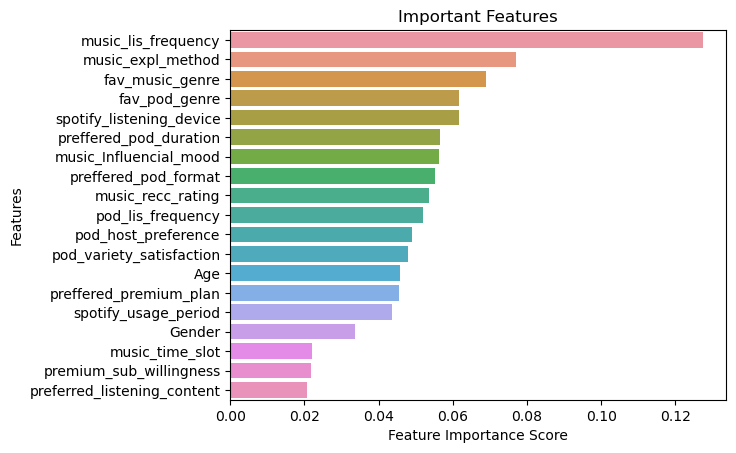

In [48]:
# Feature Importance
feature_scores = pd.Series(rf_model.feature_importances_, index = X_train.columns).sort_values(ascending = False)
feature_scores
sns.barplot(x = feature_scores, y = feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features')

plt.show()

In [33]:
# Decided to keep the least important feature as the accuracy drops as seen below from 0.718 to 0.714
X = data2.drop(['spotify_subscription_plan', 'preferred_listening_content'], axis=1)
y = data2['spotify_subscription_plan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=0)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.7147141848976711


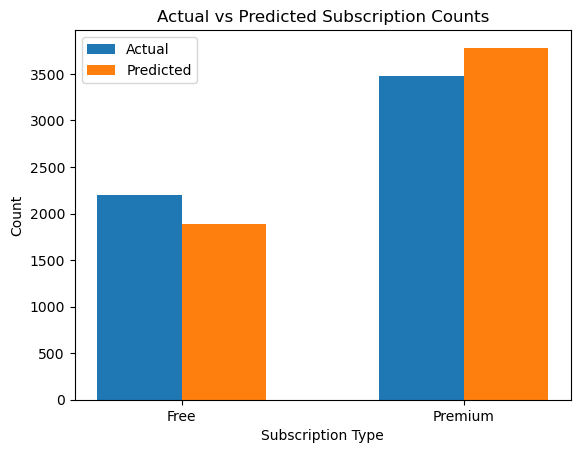

In [47]:
#Plotting actual vs predicted
y_actual = y_test 
y_predicted = rf_model.predict(X_test)
actual_counts = np.bincount(y_actual)
predicted_counts = np.bincount(y_predicted)

labels = ['Free', 'Premium']  
x = np.arange(len(labels))  
width = 0.30 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, actual_counts, width, label='Actual')
rects2 = ax.bar(x + width/2, predicted_counts, width, label='Predicted')

ax.set_xlabel('Subscription Type')
ax.set_ylabel('Count')
ax.set_title('Actual vs Predicted Subscription Counts')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

The dataset initially contained a lot of noise, which impacted model performance. To address this, I applied one-hot encoding and removed the least important features. However, these adjustments alone did not significantly improve accuracy.

To further simplify the model and improve clarity, I transformed the dataset into a binary classification format, focusing on predicting whether users are more likely to subscribe to a Premium plan or continue using the Free version. This refined goal allows for a more targeted analysis of user subscription preferences while reducing model complexity.